A notebook for analyzing particle trajectories from Jun-July, 2015

In [1]:
import netCDF4 as nc
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import datetime
from matplotlib import animation

from salishsea_tools import viz_tools

%matplotlib inline

In [2]:
sns.set_color_codes()

In [3]:
traj = nc.Dataset('/ocean/nsoontie/MEOPAR/Ariane/results/2month-summer/'
                  'SoG_surface/ariane_trajectories_qualitative.nc')
grid_B=nc.Dataset('/data/nsoontie/MEOPAR/NEMO-forcing/grid/bathy_meter_SalishSea2.nc')
data=nc.Dataset('/data/dlatorne/MEOPAR/SalishSea/nowcast/01jul15/SalishSea_1d_20150701_20150701_grid_T.nc')
depth = data.variables['deptht'][:]

#Initial Positions

<matplotlib.contour.QuadContourSet instance at 0x7f597b455c68>

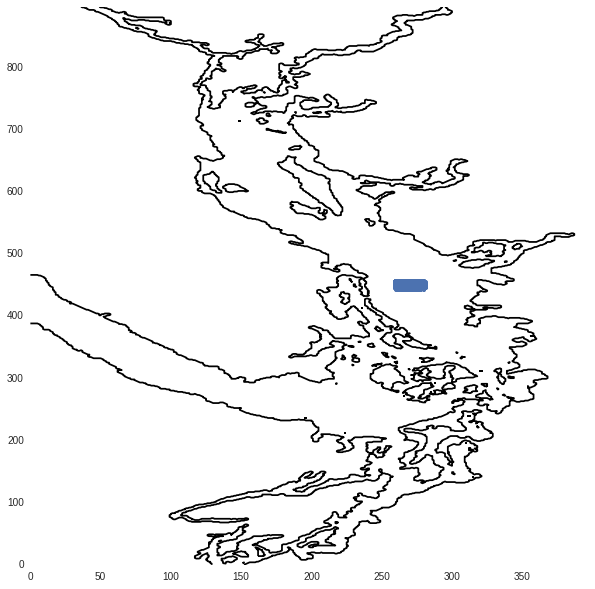

In [4]:
init_x = traj.variables['init_x']
init_y = traj.variables['init_y']
init_z = traj.variables['init_z']

fig,ax=plt.subplots(1,1,figsize=(10,10))
ax.plot(init_x,init_y,'bo')
viz_tools.plot_coastline(ax,grid_B)

#Final Positions

<matplotlib.contour.QuadContourSet instance at 0x7f597b245098>

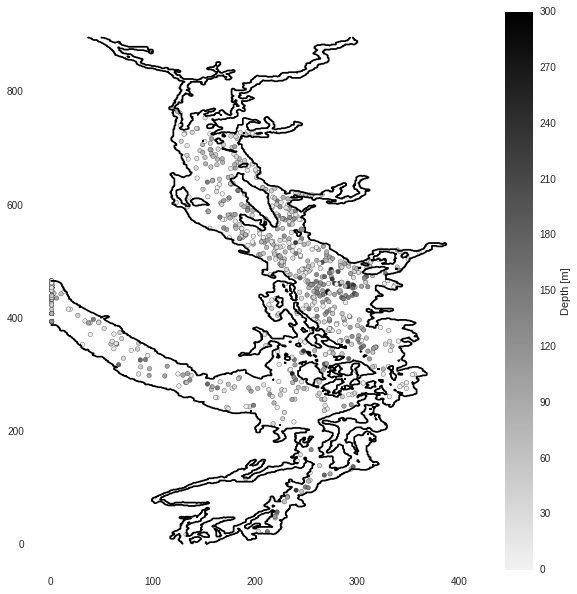

In [5]:
final_x = traj.variables['final_x']
final_y = traj.variables['final_y']
final_z = traj.variables['final_z']
final_age = traj.variables['final_age']
final_t = traj.variables['final_t']
z=np.array(final_z[:],dtype=int)

cmap = sns.light_palette('black', as_cmap=True)

fig,ax=plt.subplots(1,1,figsize=(10,10))
mesh=ax.scatter(final_x,final_y,c=depth[z],vmin=0,vmax=300,cmap=cmap)
cbar=plt.colorbar(mesh,ax=ax)
cbar.set_label('Depth [m]')
viz_tools.plot_coastline(ax,grid_B)

#Full trajectories

In [6]:
t_lat=traj.variables['traj_lat']
t_lon=traj.variables['traj_lon']
t_depth=traj.variables['traj_depth']
t_time=traj.variables['traj_time']

<matplotlib.contour.QuadContourSet instance at 0x7f597b0ce2d8>

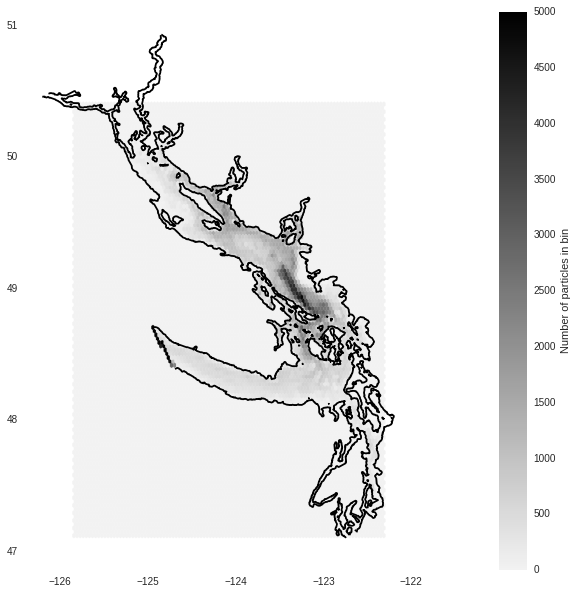

In [7]:
fig,ax=plt.subplots(1,1,figsize=(10,10))
mesh=ax.hexbin(t_lon[:].flatten(),t_lat[:].flatten(),cmap=cmap,vmin=0,vmax=5000)
cbar=plt.colorbar(mesh,ax=ax)
cbar.set_label('Number of particles in bin')
viz_tools.plot_coastline(ax,grid_B,coords='map')

In [12]:
inds = np.where(final_x[:] <=1)
inds[0].size

352

A good chunk have left the domain.

In [13]:
inds_good = np.where(final_x[:] >1)
inds_good[0].size

648

In [14]:
#intermediate
inds = np.where(np.logical_and(final_z[inds_good[0]] >=23, final_z[inds_good[0]] <=30))
print inds[0].size, float(inds[0].size)/inds_good[0].size

366 0.564814814815


In [15]:
#surface
inds = np.where(final_z[inds_good[0]] <23)
print inds[0].size, float(inds[0].size)/inds_good[0].size

263 0.405864197531


In [16]:
#deep
inds = np.where(final_z[inds_good[0]] >30)
print inds[0].size, float(inds[0].size)/inds_good[0].size

19 0.0293209876543


Most are still in the surface layer.

#Evolution

In [17]:
t_lat=traj.variables['traj_lat']
t_lon=traj.variables['traj_lon']
t_depth=traj.variables['traj_depth']
t_time=traj.variables['traj_time']

<matplotlib.contour.QuadContourSet instance at 0x7f59793040e0>

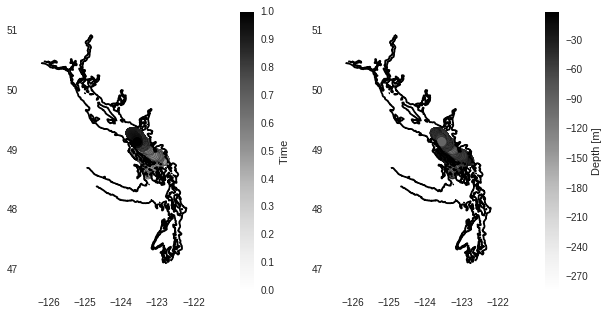

In [18]:
fig,axs=plt.subplots(1,2,figsize=(10,5))
nb=0
ax=axs[0]
mesh=ax.scatter(t_lon[:,inds[0][nb]], t_lat[:,inds[0][nb]], c=t_time[:,inds[0][nb]],s=100)
cbar=plt.colorbar(mesh,ax=ax)
cbar.set_label('Time ')
viz_tools.plot_coastline(ax,grid_B,coords='map')


ax=axs[1]
mesh=ax.scatter(t_lon[:,inds[0][nb]], t_lat[:,inds[0][nb]], c=t_depth[:,inds[0][nb]],s=100)
cbar=plt.colorbar(mesh,ax=ax)
cbar.set_label('Depth [m]')
viz_tools.plot_coastline(ax,grid_B,coords='map')
